## **Single Window Momentum Trading Strategy using Nasdaq-100**
This notebook automates the process of extracting stock tickers from the Nasdaq-100 index and implements a trading strategy based on past momentum performance.

**Key Objectives:**
1. **Extract stock tickers** from the Nasdaq-100 Wikipedia page.
2. **Fetch historical stock price data** using Yahoo Finance.
3. **Analyse stock performance** to identify best and worst performers.
4. **Implement a trading strategy**: Long the best-performing stocks and short the worst-performing stocks.

This notebook provides a step-by-step approach to achieving these goals.

## **Import Required Libraries**
This cell imports essential libraries for data retrieval, processing, and visualization:
- `yfinance`: Fetches stock price data from Yahoo Finance.
- `pandas`: Handles tabular data.
- `matplotlib`: Generates visualizations.
- `numpy`: Performs numerical operations.

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

## **Extracting Nasdaq-100 Tickers from Wikipedia**
We use `pandas.read_html()` to extract all tables from the Wikipedia page containing Nasdaq-100 index components.
- The length of `WikipediaDTs` tells us how many tables were found on the page.
- Printing `WikipediaDTs` helps us inspect the extracted tables.

In [8]:
# get all the tables from the wikipedia page 'https://en.wikipedia.org/wiki/Nasdaq-100#Components' and write them to a pandas dataframe called WikipediaDTs
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
WikipediaDTs = pd.DataFrame()
WikipediaDTs = pd.read_html(nasdaq)
print(len(WikipediaDTs)) # this will tell us how many tables there are on the page
print(WikipediaDTs)

18
[                                     0  \
0   Nasdaq-100 Index from 1985 to 2015   
1                           Foundation   
2                             Operator   
3                            Exchanges   
4                       Trading symbol   
5                         Constituents   
6                                 Type   
7                           Market cap   
8                     Weighting method   
9                      Related indices   
10                             Website   

                                          1  
0        Nasdaq-100 Index from 1985 to 2015  
1            January 31, 1985; 40 years ago  
2                              Nasdaq, Inc.  
3                                    Nasdaq  
4                               ^NDX or NDX  
5                                       101  
6                                 Large-cap  
7   US$26 trillion (as of December 2024)[1]  
8        Free-float capitalization-weighted  
9                      Nasdaq F

## **Checking the Correct Table for Nasdaq-100 Components**
To work out which table has the names and tickers, we can simply cycle through them manually (it's like opening x-mas pressies).

Since multiple tables exist on the page, we print `WikipediaDTs[4]` to check if it contains the Nasdaq-100 tickers.

In [9]:
print(WikipediaDTs[3]) # this isn't it!

    Year  Closing level Change in Index in Points Change in Index in %
0   1985         132.29                       NaN                  NaN
1   1986         141.41                      9.12                 6.89
2   1987         156.25                     14.84                10.49
3   1988         177.41                     21.16                13.54
4   1989         223.84                     46.43                26.17
5   1990         200.53                    −23.31               −10.41
6   1991         330.86                    130.33                64.99
7   1992         360.19                     29.33                 8.86
8   1993         398.28                     38.09                10.57
9   1994         404.27                      5.99                 1.50
10  1995         576.23                    171.96                42.54
11  1996         821.36                    245.13                42.54
12  1997         990.80                    169.44                20.63
13  19

In [10]:
WikipediaDTs[4] # here it is!

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


## **Extracting Stock Ticker Symbols into a List**
From the selected table, we extract the column containing **ticker symbols** and store them in `tickersLIST`.
This list will be used to fetch stock price data.

In [11]:
# now we need to get the tickers from the table and put them in a list called tickersLIST
tickersLIST = WikipediaDTs[4]['Ticker'].tolist() # this is a list
tickersLIST

['ADBE',
 'AMD',
 'ABNB',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'APP',
 'ARM',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'ADP',
 'AXON',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MSTR',
 'MDLZ',
 'MDB',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PLTR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SBUX',
 'SNPS',
 'TTWO',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

## **Fetching Stock Data from Yahoo Finance**
Now that we have the stock tickers, we use `yfinance` to fetch historical stock price data.
- The data will be used to analyse past performance.
- We focus on key metrics such as returns to determine the best and worst performers.

In [12]:
#download from yahoo finance the historical data for all tickers in the list and put it in a single dataframe called hPricesDT
hPricesDT = pd.DataFrame()
hPricesDT = yf.download(tickersLIST, start='2010-07-01', end='2021-06-30')['Close']
hPricesDT

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  101 of 101 completed

4 Failed downloads:
['ARM', 'CEG', 'GEHC', 'GFS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2010-07-01 -> 2021-06-30) (Yahoo error = "Data doesn\'t exist for startDate = 1277956800, endDate = 1625025600")')


Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TSLA,TTD,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.477655,NaN,26.660000,19.823227,24.651867,24.570000,18.283415,9.421517,7.390000,36.289600,...,1.464000,NaN,8.850000,15.796398,29.014860,32.299999,18.441492,NaN,12.485754,NaN
2010-07-02,7.431316,NaN,26.730000,19.787727,24.478041,24.309999,18.379877,9.421517,7.170000,36.066372,...,1.280000,NaN,9.010000,15.755495,28.947605,32.220001,18.083801,NaN,12.540250,NaN
2010-07-06,7.482174,NaN,26.340000,19.801929,24.465626,24.049999,18.873562,9.248794,7.040000,35.787331,...,1.074000,NaN,8.910000,15.762317,28.870743,32.169998,18.206438,NaN,12.691629,NaN
2010-07-07,7.784312,NaN,26.790001,20.902426,24.962261,24.730000,19.503441,9.570691,7.390000,35.857098,...,1.053333,NaN,9.750000,16.532700,28.419191,33.040001,18.533470,NaN,12.939894,NaN
2010-07-08,7.766856,NaN,26.850000,20.646826,25.061588,24.610001,19.730423,9.507881,7.370000,36.436104,...,1.164000,NaN,9.390000,16.512255,28.255867,33.799999,18.564129,NaN,13.079160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.012924,151.580002,574.229980,153.053131,180.697495,283.670013,71.814644,131.235901,83.820000,211.920654,...,218.856674,65.389999,171.880005,167.392532,167.733154,187.520004,29.510000,238.690002,58.690521,218.860001
2021-06-24,130.728760,150.729996,578.260010,156.242722,181.484222,286.959991,71.988411,133.909027,86.099998,213.909256,...,226.606674,75.879997,175.059998,169.650162,169.305923,191.940002,30.320000,241.710007,58.717102,219.639999
2021-06-25,130.434814,149.669998,579.659973,156.822617,182.668961,288.739990,73.656708,131.904175,85.620003,215.445099,...,223.956665,76.019997,173.820007,169.254395,170.663818,194.339996,30.860001,243.000000,59.461483,218.839996


## **Calculating Stock Performance**
We compute returns over a selected single period to rank stocks based on performance.
- The top performers will be considered for **long positions**.
- The worst performers will be considered for **short positions**.

First, we we need to clean the data and remove NaN values from our DataFrame.

In [13]:
# identify any tickers with NaN values and list them in a list called tickersNaN
tickersNaN = []
for ticker in tickersLIST:
    if hPricesDT[ticker].isnull().values.any() == True:
        tickersNaN.append(ticker)
hPricesDT.drop(tickersNaN, axis=1, inplace=True) # drop the tickers with NaN values from the dataframe hPricesDT


hPricesDT

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SBUX,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,7.477655,26.660000,19.823227,24.651867,24.570000,18.283415,9.421517,7.390000,36.289600,5.548000,...,9.440612,20.639999,13.660731,1.464000,8.850000,15.796398,29.014860,32.299999,18.441492,12.485754
2010-07-02,7.431316,26.730000,19.787727,24.478041,24.309999,18.379877,9.421517,7.170000,36.066372,5.457000,...,9.321935,20.510000,13.450066,1.280000,9.010000,15.755495,28.947605,32.220001,18.083801,12.540250
2010-07-06,7.482174,26.340000,19.801929,24.465626,24.049999,18.873562,9.248794,7.040000,35.787331,5.503000,...,9.038639,20.459999,13.498680,1.074000,8.910000,15.762317,28.870743,32.169998,18.206438,12.691629
2010-07-07,7.784312,26.790001,20.902426,24.962261,24.730000,19.503441,9.570691,7.390000,35.857098,5.671500,...,9.341074,21.480000,14.017238,1.053333,9.750000,16.532700,28.419191,33.040001,18.533470,12.939894
2010-07-08,7.766856,26.850000,20.646826,25.061588,24.610001,19.730423,9.507881,7.370000,36.436104,5.811000,...,9.509521,21.410000,14.600616,1.164000,9.390000,16.512255,28.255867,33.799999,18.564129,13.079160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.012924,574.229980,153.053131,180.697495,283.670013,71.814644,131.235901,83.820000,211.920654,175.190994,...,102.613823,268.859985,141.826355,218.856674,171.880005,167.392532,167.733154,187.520004,29.510000,58.690521
2021-06-24,130.728760,578.260010,156.242722,181.484222,286.959991,71.988411,133.909027,86.099998,213.909256,172.453995,...,103.009346,273.799988,142.383743,226.606674,175.059998,169.650162,169.305923,191.940002,30.320000,58.717102
2021-06-25,130.434814,579.659973,156.822617,182.668961,288.739990,73.656708,131.904175,85.620003,215.445099,170.072998,...,103.975143,268.970001,142.129486,223.956665,173.820007,169.254395,170.663818,194.339996,30.860001,59.461483


## **Executing the Trading Strategy**
Based on our analysis, we implement the strategy:
- **Long positions**: Buy the best-performing stocks.
- **Short positions**: Sell (short) the worst-performing stocks.

This strategy aims to capitalise on momentum trends in stock prices.

In [14]:
print (tickersNaN)

['ABNB', 'APP', 'ARM', 'TEAM', 'CDW', 'CEG', 'CRWD', 'DDOG', 'FANG', 'DASH', 'GEHC', 'GFS', 'KHC', 'META', 'MDB', 'NXPI', 'PLTR', 'PANW', 'PYPL', 'PDD', 'TTD', 'WDAY', 'ZS']


In [15]:
# set signal period and convert to timestamps
signal_start_date = '2015-07-01'
print(signal_start_date)
signal_start_date = pd.Timestamp(signal_start_date)
print(signal_start_date)

# set signgal_end_date to be 1 year after signal_start_date
signal_end_date = signal_start_date + pd.DateOffset(years=1) + pd.DateOffset(days=-1)
print(signal_end_date)

# create a dataframe called signalDT that contains the prices for the signal period
signalDT = pd.DataFrame()
signalDT = hPricesDT[signal_start_date:signal_end_date]
print(hPricesDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# convert the prices to index values and put them in a dataframe called signalIndexDT
signalIndexDT = pd.DataFrame()
signalIndexDT = signalDT / signalDT.iloc[0]
print(signalIndexDT[signal_start_date+pd.DateOffset(days=-5):signal_start_date+pd.DateOffset(days=+5)]['AAPL'])

# reset the signal dates to the first and last dates in the signalIndexDT dataframe index (noting that holidays and weekends will be skipped)
signal_start_date = signalIndexDT.index[0]
signal_end_date = signalIndexDT.index[-1]
print(signal_start_date)
print(signal_end_date)
print(signalIndexDT[signal_end_date:signal_end_date]['AAPL'])


2015-07-01
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2015-06-26    28.425022
2015-06-29    27.927166
2015-06-30    28.128996
2015-07-01    28.391382
2015-07-02    28.355505
2015-07-06    28.256824
Name: AAPL, dtype: float64
Date
2015-07-01    1.000000
2015-07-02    0.998736
2015-07-06    0.995261
Name: AAPL, dtype: float64
2015-07-01 00:00:00
2016-06-30 00:00:00
Date
2016-06-30    0.770596
Name: AAPL, dtype: float64


In [16]:
# create a list of the 5 tickers with the highest index numbers at the end of the period
top5 = signalIndexDT.iloc[-1].nlargest(5).index.tolist()

# create a list of the 5 tickers with the lowest index numbers at the end of the period
bottom5 = signalIndexDT.iloc[-1].nsmallest(5).index.tolist()

# create a list of the other tickers
otherTickers = signalIndexDT.columns.tolist()
for ticker in top5:
    otherTickers.remove(ticker)
for ticker in bottom5:
    otherTickers.remove(ticker)

top5, bottom5, otherTickers


(['NVDA', 'AMD', 'AMZN', 'IDXX', 'XEL'],
 ['BIIB', 'VRTX', 'REGN', 'GILD', 'MU'],
 ['AAPL',
  'ADBE',
  'ADI',
  'ADP',
  'ADSK',
  'AEP',
  'AMAT',
  'AMGN',
  'ANSS',
  'ASML',
  'AVGO',
  'AXON',
  'AZN',
  'BKNG',
  'BKR',
  'CCEP',
  'CDNS',
  'CHTR',
  'CMCSA',
  'COST',
  'CPRT',
  'CSCO',
  'CSGP',
  'CSX',
  'CTAS',
  'CTSH',
  'DXCM',
  'EA',
  'EXC',
  'FAST',
  'FTNT',
  'GOOG',
  'GOOGL',
  'HON',
  'INTC',
  'INTU',
  'ISRG',
  'KDP',
  'KLAC',
  'LIN',
  'LRCX',
  'LULU',
  'MAR',
  'MCHP',
  'MDLZ',
  'MELI',
  'MNST',
  'MRVL',
  'MSFT',
  'MSTR',
  'NFLX',
  'ODFL',
  'ON',
  'ORLY',
  'PAYX',
  'PCAR',
  'PEP',
  'QCOM',
  'ROP',
  'ROST',
  'SBUX',
  'SNPS',
  'TMUS',
  'TSLA',
  'TTWO',
  'TXN',
  'VRSK',
  'WBD'])

## **Visualizing Stock Performance**
Using `matplotlib`, we generate visualisations to analyse performance trends of selected stocks.
- This helps us understand historical price movements before making trading decisions.

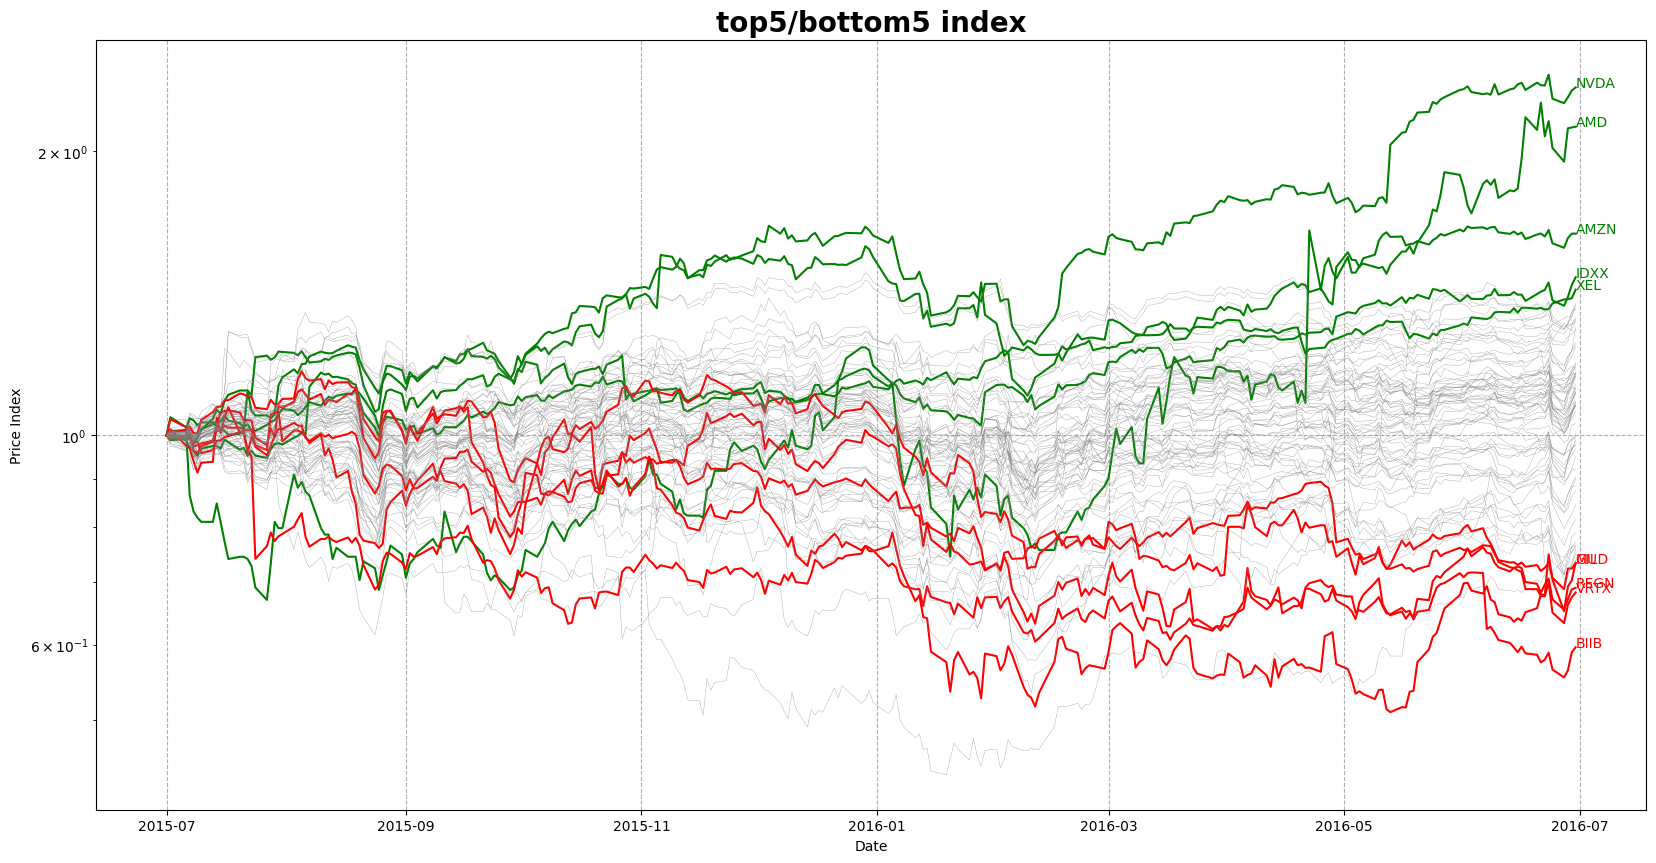

In [17]:
# plot the index for all tickers in the dataframe hPricesIDX
plt.figure(figsize=(20,10))
for ticker in top5:
    plt.plot(signalIndexDT[ticker], color='green')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='green')
for ticker in bottom5:
    plt.plot(signalIndexDT[ticker], color='red')
    plt.text(signalIndexDT.index[-1], signalIndexDT[ticker].iloc[-1], ticker, color='red')
for ticker in otherTickers:
    plt.plot(signalIndexDT[ticker], color='grey', linewidth='0.2')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('top5/bottom5 index', fontsize=20, fontweight='bold')
# use a log scale for the y axis
plt.yscale('log')
# plot gridlines
plt.grid(which='major', axis='both', linestyle='--')


plt.show()


## **Evaluating Strategy Performance**
We will evaluate the strength of our strategy on **unseen** data. That is, we have determined which stocks outperform and underperform in 07/2015 to 07/2016 and will then track our portfolio over the following two years based on the historical results. 

In this way, we have no 'look ahead bias', which is important!

In [18]:
#set up long portfolio
opening_portfolio_value = 1000000

# create a list of the prices in hPricesDT for top5
top5Prices = []
top5Prices = signalDT.iloc[-1][top5].tolist()
print(top5Prices)

# set top5Weights to be the portfolio size divided by the prices in top5Prices
top5shareCount = []
top5shareCount = opening_portfolio_value / 5 / np.array(top5Prices)


#hPricesDT.iloc[signal_end_index][top5]
longPORTinput = {'Ticker': top5, 'Price': top5Prices, 'ShareCount': top5shareCount}
longPORT = pd.DataFrame(longPORTinput)
# set the index of longPORT to be the tickers
longPORT.set_index('Ticker', inplace=True)
longPORT


# check the opening value of the portfolio
currentValue = longPORT['Price'] * longPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

longPORT


[1.1540710926055908, 5.139999866485596, 35.78099822998047, 92.86000061035156, 34.23613739013672]
Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
NVDA,1.154071,173299.549119
AMD,5.140000,38910.506847
AMZN,35.780998,5589.558981
IDXX,92.860001,2153.779870
XEL,34.236137,5841.780506


In [19]:
bottom5Prices = []
bottom5Prices = signalDT.iloc[-1][bottom5].tolist()
bottom5shareCount = []
bottom5shareCount = opening_portfolio_value / 5 / np.array(bottom5Prices)
shortPORTinput = {'Ticker': bottom5, 'Price': bottom5Prices, 'ShareCount': bottom5shareCount}
shortPORT = pd.DataFrame(shortPORTinput)
shortPORT.set_index('Ticker', inplace=True)

# check the opening value of the portfolio
currentValue = shortPORT['Price'] * shortPORT['ShareCount']
print('Total value of the portfolio is: ', currentValue.sum())

shortPORT

Total value of the portfolio is:  1000000.0


,Price,ShareCount
Ticker,,
BIIB,241.820007,827.061426
VRTX,86.019997,2325.040779
REGN,348.781799,573.424417
GILD,60.493755,3306.126374
MU,13.469588,14848.263796


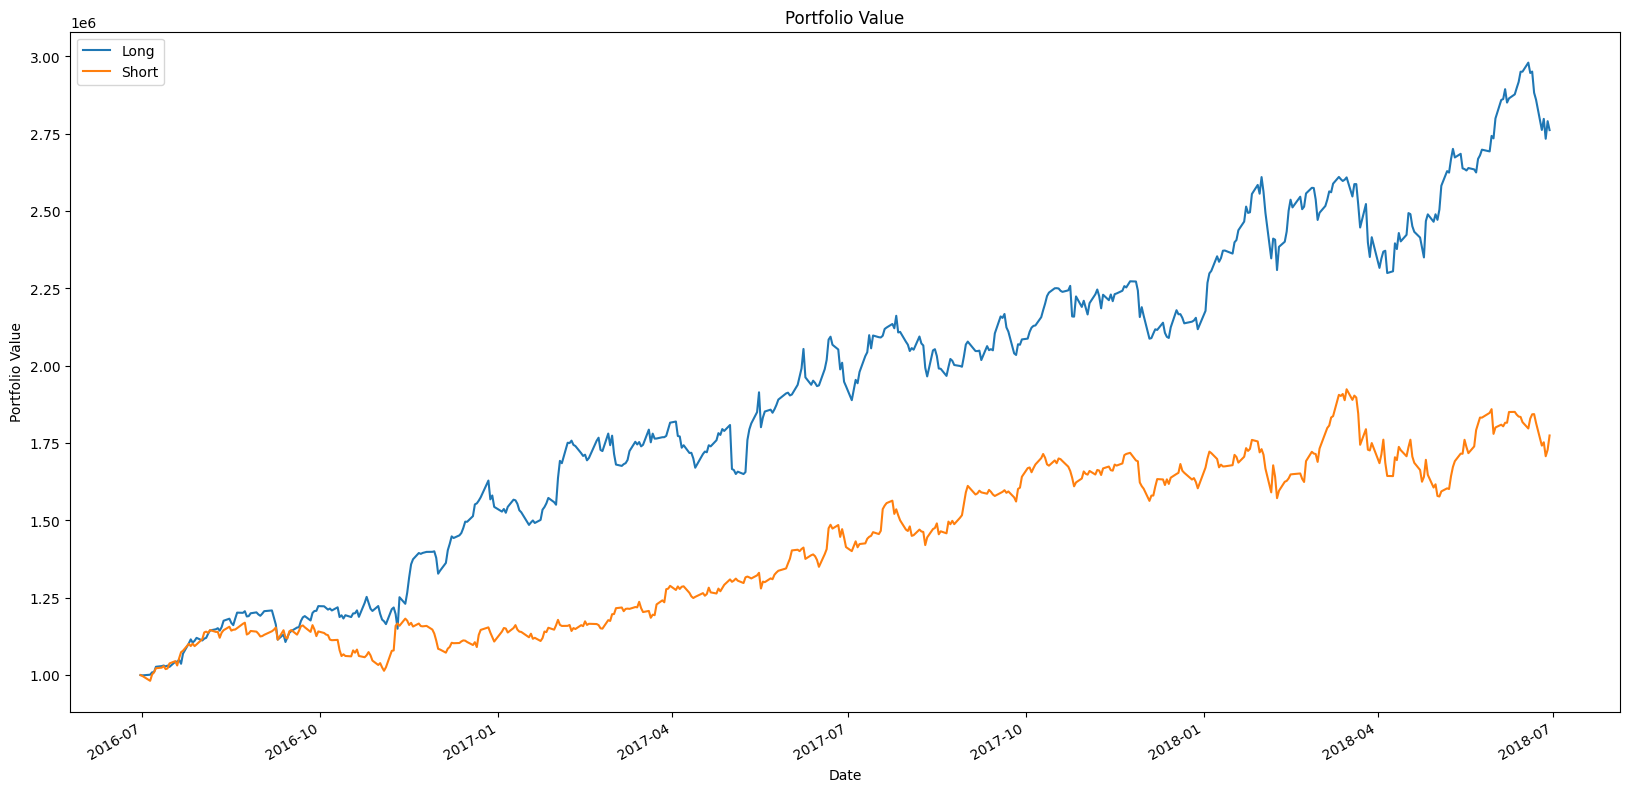

In [ ]:
# define trading_start_date and tranding_end_date
trading_start_date = signal_end_date
# set trading_end_date to be 2 year after trading_start_date
trading_end_date = trading_start_date + pd.DateOffset(years=2)

# calculate portfolio values during the trading period
longPORT_values = hPricesDT[trading_start_date:trading_end_date][top5]*longPORT['ShareCount']
shortPORT_values = hPricesDT[trading_start_date:trading_end_date][bottom5]*shortPORT['ShareCount']

#chart the performance of the long and short portfolios
longPORT_values['Total'] = longPORT_values.sum(axis=1)
shortPORT_values['Total'] = shortPORT_values.sum(axis=1)
longPORT_values['Total'].plot(figsize=(20,10))
shortPORT_values['Total'].plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value')
plt.legend(['Long', 'Short'])
